# Co trzeba omówić

- Co to jest sygnał?
- Jak się ma sygnał do odwzorowania rzeczywistości?
- Jak można podzielić sygnały i dlaczego to jest ważne?
- Czym się różni sygnał analogowy od dyskretnego?
- Jak zamienić sygnał analogowy na dyskretny?
 - Co to jest próbkowanie?
 - Twierdzenie o próbkowaniu
 - Jak wygląda undersampling w praktyce? (skrypt)
 - Co to jest kwantyzacja?
 - ADC i DAC
 - Zastosowania
   - Sampling sygnału audio
- Co to jest filtr?
 - to bardzo krótko i bardzo ogólnie
- Jakie informacje można wyciągnąć z sygnału?
 - Podstawowe rzeczy - wartości itd.
 - Krótko o autokorelacji
 - Co to jest analiza częstotliwościowa?
   - Jak zamienić sygnał z dziedziny czasu na częstotliwości?
   - Bardzo ogólnie: matematyczne podstawy transformaty Fouriera
   - Odwrotna transformata Fouriera: zamiana sygnału z dziedziny częstotliwości na dziedzinę czasu
   - Jak czytać charakterystykę częstotliwościową: fajne obrazki
     - Na podstawie fajnych obrazków i radia omówić modulację: AM, FM - i tylko na nich
   - Jak przyspieszyć obliczenia używając FFT
   - Zastosowania
     - OFDM
- Omówić pokrótce falki jako uogólnienie Fouriera
- Zastosowania, których nie wymieniliśmy wyżej, a są fajne
  - Rozmycie Gaussowskie
  - Efekty gitarowe jako filtry
  - Szybki tutorial jak zostać youtuberem i zarabiać na przesterach
  - Jak działa WiFi?
  - Sygnał EKG
  - Czy coś jeszcze?

<h1 align="center">Cyfrowe przetwarzanie sygnałów</h1>
<h2 align="center">w bardzo krótkiej i uproszczonej wersji</h2>

<center>Robert Ochmanek i Paweł Nowiszewski</center>

# Co to jest sygnał?

- model abstrakcyjny mierzalnej wielkości, która się zmienia,
    - zazwyczaj w czasie (choć niekoniecznie)
- który możemy wyrazić funkcją zależną od argumentów
- generowany przez systemy, zjawiska fizyczne lub inne

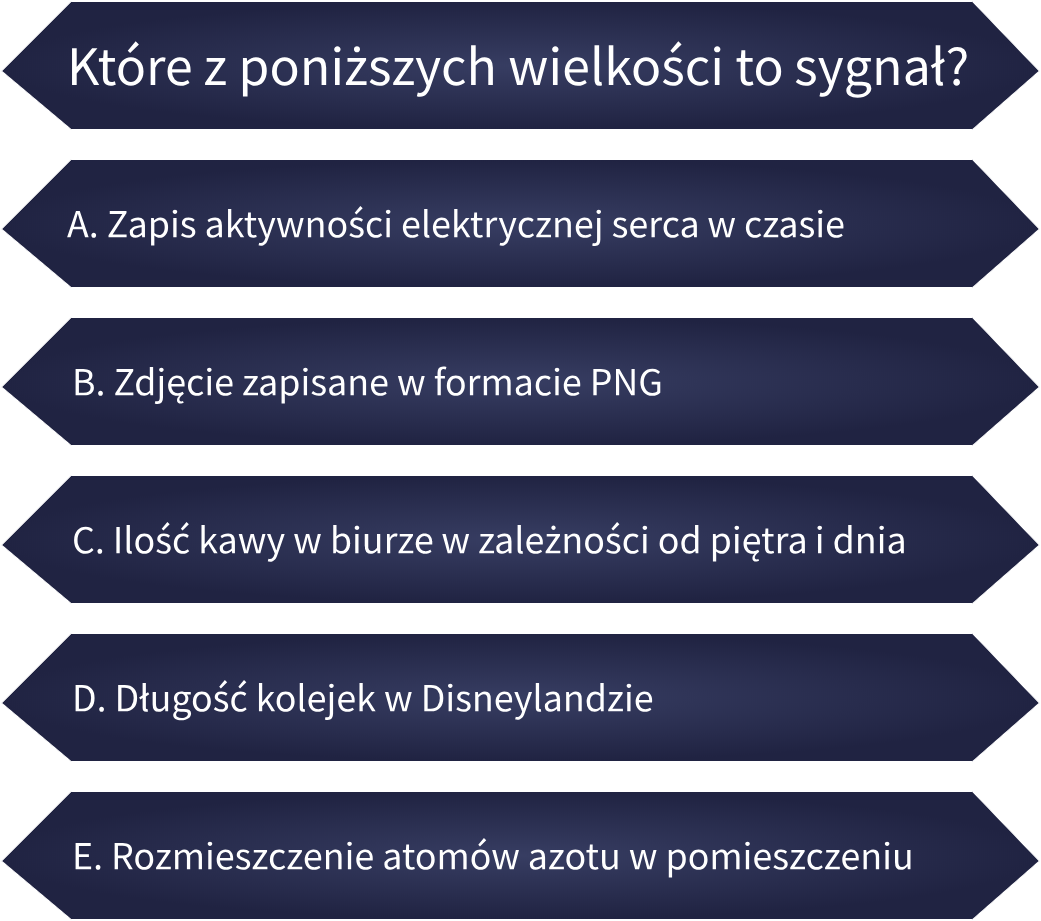

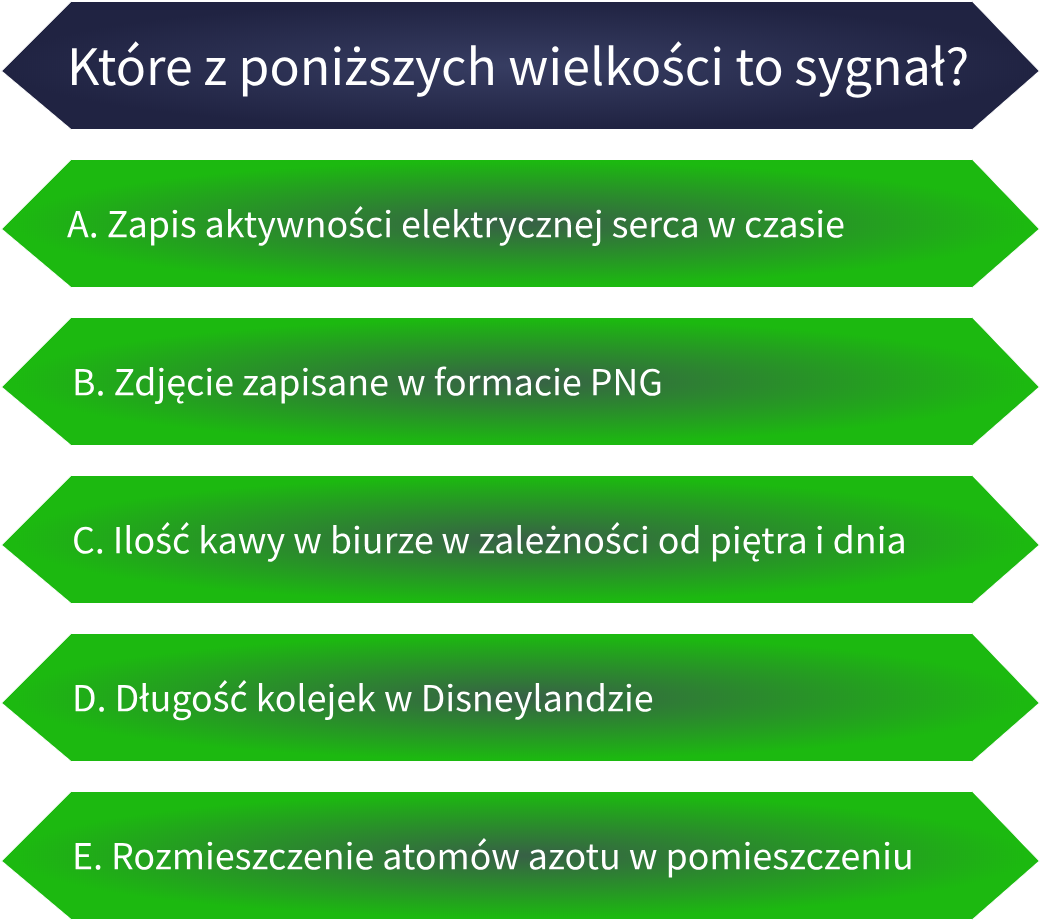

## Zapis aktywności elektrycznej serca

**Elektrokardiogram** (EKG) to zapis zmian elektrycznych w pracy serca w czasie, który możemy wyrazić funkcją: $U_N(t)$

gdzie N to odprowadzenie (miejsca pomiaru), U to napięcie na odprowadzeniu, a t to czas w sekundach

- czynność elektryczna serca wynika z impulsów nerwowych pobudzających mięśnie serca do pracy
- pokazywane jest na nim napięcie mierzone z różnych punktów na ciele
- pozwala na diagnostykę problemów z układem krążenia

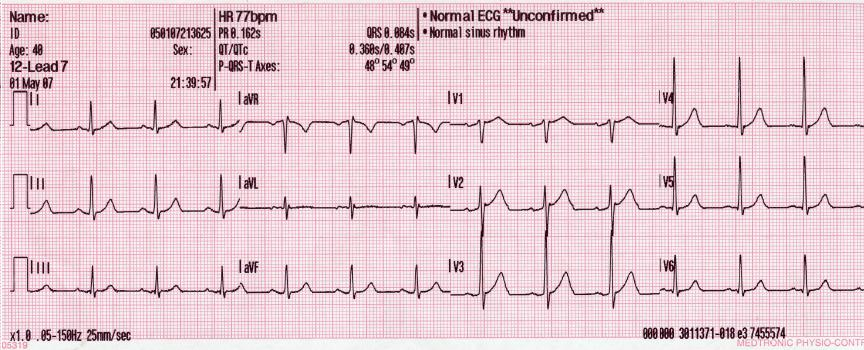

## Formaty zapisu obrazu rastrowego

Większość nieskompresowanych obrazów rastrowych możemy zapisać w postaci sygnału: $f(x, y) = (r_{x, y}, g_{x, y}, b_{x, y})$

gdzie x, y - współrzędne punktu, zaś r, g, b - składowe kolorów

**Uwaga**:
- algorytmy kompresji warunkują sposób zapisu: przykładowo JPEG stosuje transformację kosinusową
- animowane obrazy będą posiadały dodatkowy argument reprezentujący czas; algorytmy kompresji wprowadzą większy stopień skomplikowania
- składowe kolorów zależą od tzw. przestrzeni kolorów, ponadto mogą również posiadać dodatkowe komponenty (przezroczystość)

## Teoria kolejek

Kolejki mogą być również reprezentowane w formie sygnałów zależnych od konkretnych parametrów

- przykładowo, liczba osób stojących w kolejce w zależności od czasu jest sygnałem
- teoria kolejek jest bardzo skomplikowanym działem i nie będziemy tutaj go szerzej omawiać
    - dla ciekawych: film dokumentalny na YouTube *Disney's FastPass: A Complicated History*

## Sygnały nie muszą być zależne od czasu

**W teorii:** każda zmienność wielkości zależna od parametru, którą da się wyrazić funkcją, jest sygnałem
- przykład: obrazy rastrowe
- w fizyce niektóre zmiany rozpatruje się również jako sygnały niezależne od czasu

**W praktyce:** wiele sygnałów rozpatrywanych w teorii sygnałów jest zależnych od czasu
- z tego powodu na argument sygnału czasem ogólnie mówi się **czas**
- w szczególności: obraz rastrowy jest sygnałem dyskretnym
    - opisując jego klasyfikację ze względu na argumenty możemy czasem - nie do końca poprawnie - powiedzieć, że jest to sygnał *czasu dyskretnego*
    - ale bitmapa nie zależy od czasu
    - i przekształcenia podobne do transformaty Fouriera, mimo ogólnego jej opisu, mogą mieć sens!

## Sygnały nie muszą być naukowe!

- Twój wynik w przysiadzie w kilogramach w zależności od treningu
- Twoje położenie na kuli ziemskiej w zależności od czasu
- Ilość powietrza w Twoich płucach w zależności od czasu
- i wiele, wiele innych

**to również sygnały!**

In [5]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

from playsound import playsound
#"Carefree"
#Kevin MacLeod (incompetech.com)
#Licensed under Creative Commons: By Attribution 3.0
#http://creativecommons.org/licenses/by/3.0/
playsound('./NONFREE/Carefree.wav')

sample_rate, data = wavfile.read('./NONFREE/Carefree.wav')

dt = 1/sample_rate
length_in_s = len(data) * dt
t = np.arange(0, length_in_s, dt)

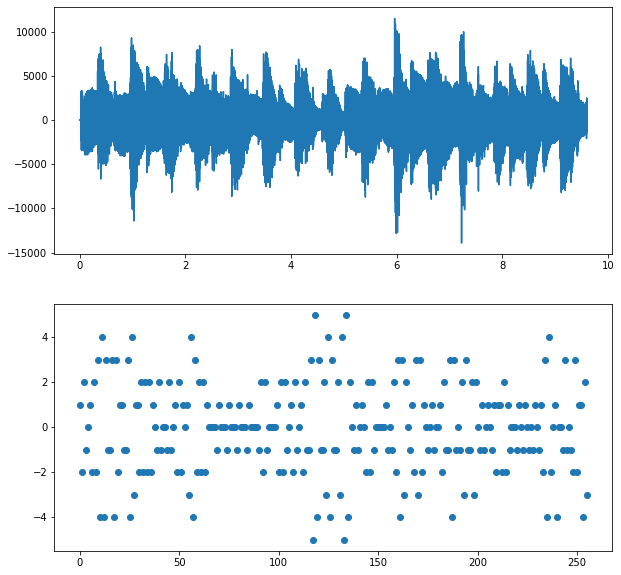

In [6]:
fig, (ax0, ax1) = plt.subplots(2, 1)
fig.set(size_inches=(10, 10))

ax0.plot(t[0:len(data)], data)
n_samples = 256
ax1.plot(range(n_samples), data[0:n_samples], 'o')


# Podział sygnałów

## Po co?

**Klasyfikacja sygnałów pozwala nam na opisanie operacji, które można wykonać na sygnale**

Transformata Fouriera dla sygnałów ciągłych:

$X(f) = \int_{-\infty}^{+\infty} x(t) e^{-j 2\pi ft} dt$


Transformata Fouriera dla sygnałów dyskretnych: 

$X(k) = \sum_{n = 0}^{N-1} x_n e^{-\frac{j 2\pi kn}{N}}$

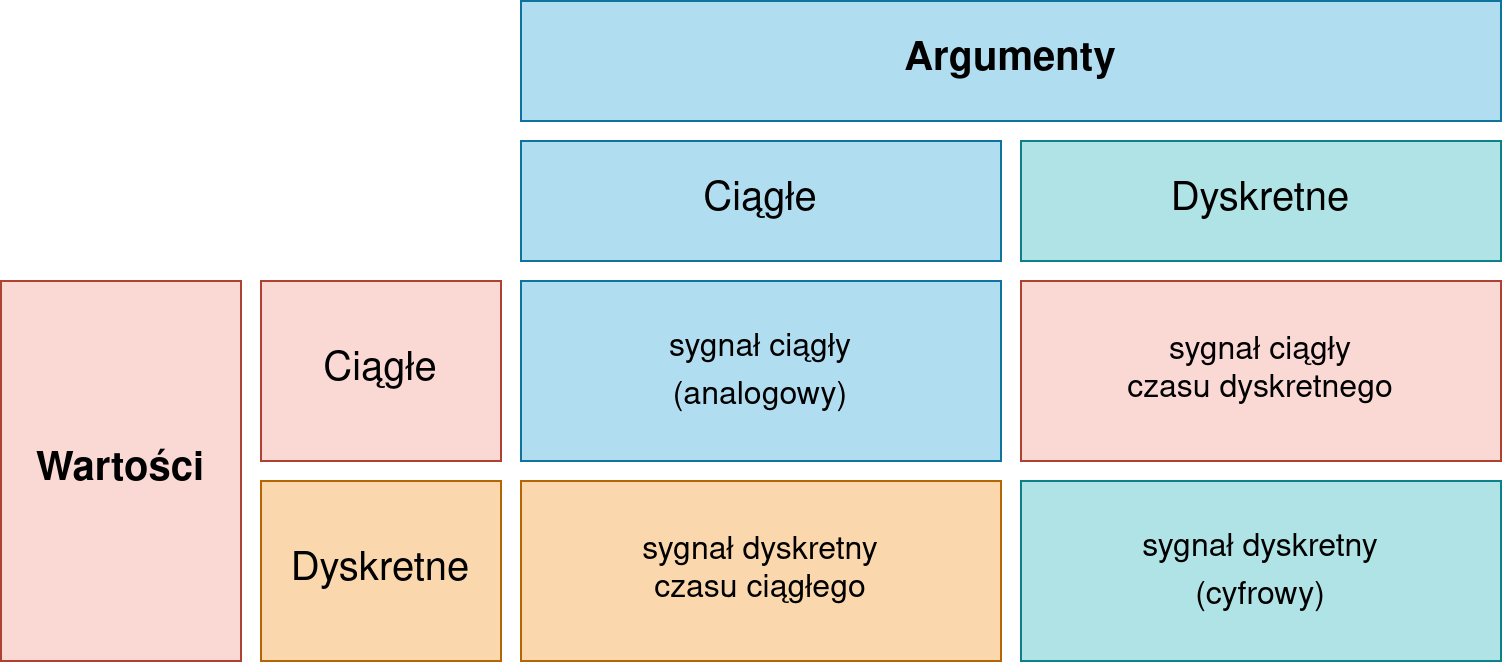

## Sygnały ciągłe

- mają ciągłą dziedzinę
  - są zdefiniowane dla każdej wartości argumentu
  - dla danego przedziału bądź na całym zbiorze
- przypadki szczególne
  - jednowymiarowy sygnał ciągły
    - w przetwarzaniu sygnałów zazwyczaj jest wynikiem przetworzenia fali (np. akustycznej) na prąd
  - dwuwymiarowy sgynał ciągły
    - np. obraz analogowy zarejestrowany na kliszy fotograficznej

Dla losowo wybranej liczby rzeczywistej z przedziału [0, 1] 0.1738493872603195 wartość funkcji wynosi 0.8877011380224684


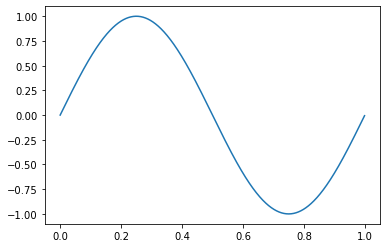

In [10]:
def generate_sine(x, amplitude=1, frequency=1, time_shift=0):
    return amplitude * np.sin(2*np.pi*frequency*x + time_shift)

import random
random.seed()

x = random.random()
print("Dla losowo wybranej liczby rzeczywistej z przedziału [0, 1]"
      f" {x} wartość funkcji wynosi {generate_sine(x)}")

x_series = np.arange(0, 1, 0.001)
fig, ax = plt.subplots()
ax.plot(x_series, generate_sine(x_series))

## Sygnały ciągłe czasu dyskretnego

- powstają poprzez **próbkowanie** sygnału ciągłego
  - próbkowanie - proces pobierania próbek (określonych wartości) z sygnału z określoną częstotliwością próbkowania
- wartości sygnału są nadal ciągłe
- powyższy wykres był de facto sygnałem ciągłym czasu dyskretnego
  - częstotliwość próbkowania: 1 kHz

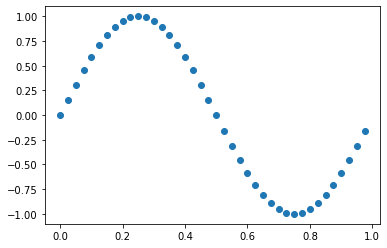

In [13]:
x_series = np.arange(0, 1, 0.025)
fig, ax = plt.subplots()
ax.scatter(x_series, generate_sine(x_series))

## Próbkowanie

- próbkowanie jest konieczne, aby przetwarzać sygnał cyfrowo
- jak próbkować sygnał tak, żeby nie stracić informacji?

### Twierdzenie Nyquista-Shannona
**Jeżeli najwyższa częstotliwość składowa sygnału wynosi B, to najniższa  częstotliwość próbkowania pozwalająca na odtworzenie sygnału z próbek wynosi 2B**

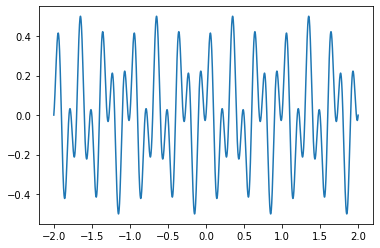

In [25]:
t_series = np.arange(-2, 2, 0.0001)
wave = generate_sine(t_series, amplitude=1, frequency=5)
wave *= generate_sine(t_series, amplitude=0.5, frequency=2, time_shift=0.3)

fig, ax = plt.subplots()
ax.plot(t_series, wave)

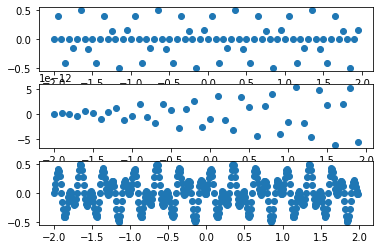

In [35]:
# TODO: check and produce aliasing
def sample_signal(data, sampling_frequency, samples_per_unit):
    sample_distance = int(samples_per_unit / sampling_frequency)
    return data[0:-1:sample_distance]

good_sampling = sample_signal(wave, 20, 10000)
good_sampling_t = np.arange(-2, 2, 0.05)
undersampling = sample_signal(wave, 10, 10000)
undersampling_t = np.arange(-2, 2, 0.1)
oversampling = sample_signal(wave, 100, 10000)
oversampling_t = np.arange(-2, 2, 0.01)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.scatter(good_sampling_t, good_sampling)
ax2.scatter(undersampling_t, undersampling)
ax3.scatter(oversampling_t, oversampling)
    

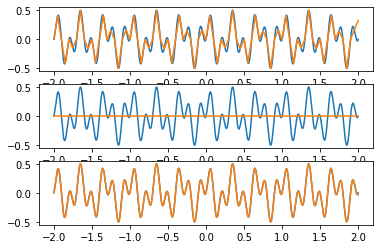

In [31]:
from scipy.interpolate import interp1d

f_good = interp1d(good_sampling_t, good_sampling, fill_value="extrapolate")
f_bad = interp1d(undersampling_t, undersampling, fill_value="extrapolate")
f_over = interp1d(oversampling_t, oversampling, fill_value="extrapolate")

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(t_series, wave)
ax1.plot(t_series, f_good(t_series))

ax2.plot(t_series, wave)
ax2.plot(t_series, f_bad(t_series))

ax3.plot(t_series, wave)
ax3.plot(t_series, f_over(t_series))

# Warsztaty sygnałów

**Jak można przeanalizować sygnał?**
  - wyciągnąć podstawowe informacje - amplituda, rodzaj sygnału
  - sprawdzić, jaki zakres częstotliwości zajmują
      - analiza częstotliwościowa sygnału
      - analiza widmowa sygnału
  - obliczyć moc
  - sprawdzić, czy sygnał ma tendencję do powtarzania się w czasie (autokorelacja)
  - i wiele innych

# Warsztaty sygnałów

**Jak można przekształcać sygnały?**
  - filtrowanie sygnału
  - (de)modulacja
  - podstawowe operacje na funkcjach: np. przesunięcia, symetrie
  - i wiele innych

Co możemy powiedzieć o tym sygnale:
- jest to sygnał cyfrowy (dyskretny czas, dyskretne wartości)
- zależy od czasu
- ma pewną widoczną okresowość
- intuicyjnie: pewnie ma skończoną moc

In [5]:
import random
random.seed()

max_sample = max(data)
min_sample = min(data)
sample_codes_count = len(set(data))

# UWAGA: to jest wartość średnia sygnału w przedziale,
# nie całego - sygnał jest traktowany jako skończony
# Będzie to widoczne zwłaszcza przy analizie częstotliwościowej!
def discrete_signal_average(data):
    values_sum = sum(data)
    sample_count = len(data) + 1
    return values_sum / sample_count

def discrete_signal_energy(data):
    values_squared = [x^2 for x in data]
    return sum(values_squared)

def discrete_average_power(data):
    values_squared = [x^2 for x in data]
    return discrete_signal_average(values_squared)

print(f"Liczba wartości sygnału: {sample_codes_count} - z przedziału [{min_sample}; {max_sample}]")
random_sample = random.randint(0, len(data))
print(f"Losowo wybrana próbka {random_sample} ma wartość {data[random_sample]}")
print(f"Wartość średnia sygnału: {discrete_signal_average(data)}, energia sygnału: {discrete_signal_energy(data)},",
       f"średnia moc sygnału: {discrete_average_power(data)}")

Liczba wartości sygnału: 14403 - z przedziału [-13929; 11504]
Losowo wybrana próbka 315981 ma wartość 1079
Wartość średnia sygnału: 0.22847246652610503, energia sygnału: 96955, średnia moc sygnału: 0.2289163453660702


# Analiza częstotliwościowa

**Częstotliwość** - powtarzalność zjawiska w określonej jednostce czasu

Sporo sygnałów:
- określonych jest w dziedzinie czasu: **f(t)**
- ma komponenty powtarzające się z określoną częstotliwością

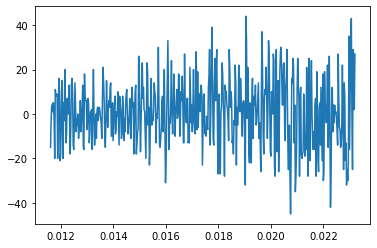

In [16]:
fig2, ax = plt.subplots()
ax.plot(t[512:1024], data[512:1024])
plt.show()

# Rozwiązanie - funkcje trygonometryczne!

- sin(x) - ma częstotliwość 1 Hz
- sin(2x) - częstotliwość 2 Hz
- sin(nx) - częstotliwość n Hz

**Gdyby tylko dało się wyrazić naszą funkcję za pomocą sumy wielu sinusów!**

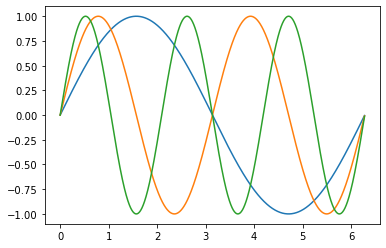

In [22]:
sintime = np.arange(0, 2*np.pi, np.pi/720)
def gen_sin(data, freq):
    return [np.sin(x * freq) for x in data]

fig3, ax = plt.subplots()
ax.plot(sintime, gen_sin(sintime, 1))
ax.plot(sintime, gen_sin(sintime, 2))
ax.plot(sintime, gen_sin(sintime, 3))
plt.show()

# Bardzo szybko: teoria transformaty Fouriera
## Przestrzeń liniowa
**Przestrzeń liniowa** - abstrakcyjny zbiór elementów ze zdefiniowanymi podstawowymi operacjami: dodawanie i mnożenie przez skalar.

Elementy w przestrzeni liniowej wyraża się poprzez dodawanie i mnożenie pewnej **bazy**

**Czy możemy zrobić przestrzeń liniową, w której bazą będzie nieskończony zbiór funkcji typu sin(x), sin(2x), ...?**

## Twierdzenie Eulera-Fouriera

**Tak!**

**W bardzo dużym skrócie** szereg sinusów i cosinusów wyrażony wzorem sin(nx):
- jest liniowo niezależny (ortogonalny - żaden z elementów nie może zostać wyrażony poprzez inne elementy)
- jest maksymalnie uproszczony (ortonormalny)
- z wzoru Eulera-Fouriera, przy założeniu odpowiednich współczynników, może posłużyć do zbudowania szeregu zbieżnego do niej

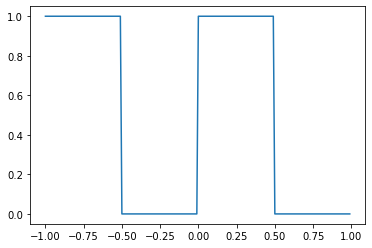

In [134]:
#TODO: illustrate fourier series

signal_begin = -1
signal_end = 1
time_simplesig = np.arange(signal_begin, signal_end, 0.01)
pwm_simplesig = [1 * int((2*x+1)%2) for x in time_simplesig]

fig4, ax = plt.subplots()
ax.plot(time_simplesig, pwm_simplesig)


# Jak zrobić taki szereg?

$s_N(x) = \sum_{n = -N}^N c_n \cdot e^{j \frac{2\pi}{P} nx}$

co się rozwija do:

$s_N(x) = \frac{a_0}{2} + \sum_{n = 1}^N \left( a_n \cos \left(\frac{2\pi}{P} nx \right) + b_n \sin \left(\frac{2\pi}{P} nx \right) \right)$

<class 'numpy.ndarray'>


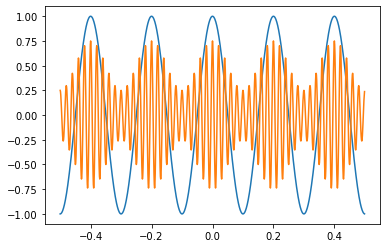

In [264]:
def amplitude_modulation(time, data, freq, mod_const, a0):
    signal = np.array(data)
    time_arg = 2 * np.pi * freq
    carrier = a0 * np.cos(time_arg * time)
    return carrier + a0 * mod_const * signal * carrier

time = np.arange(-0.5, 0.5, 0.001)
freq_carrier = 50
freq_data = 5

signal = np.array([np.cos(2*np.pi*freq_data * t) for t in time])
mod_signal = amplitude_modulation(time, signal, freq_carrier, 1, 0.5)

plt.plot(time, signal, time, mod_signal)

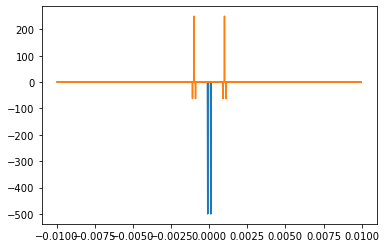

In [273]:
# TODO: normalize
pure_signal_fft = np.fft.fft(signal)
mod_signal_fft = np.fft.fft(mod_signal)
time_pure = np.fft.fftfreq(len(signal), freq_carrier)
time_mod = np.fft.fftfreq(len(mod_signal), freq_carrier)

plt.plot(time_pure, pure_signal_fft.real, time_mod, mod_signal_fft.real)

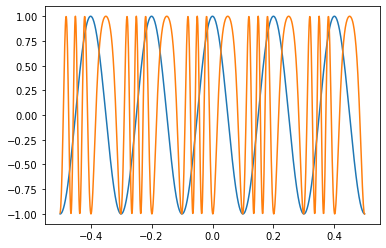

In [291]:
def frequency_modulation(time, data, carrier_freq, mod_const, ac, freq_deviation = 1):
    signal = np.array(data)
    angular_freq = 2 * np.pi * carrier_freq
    carrier = angular_freq * time
    return ac * np.cos(carrier + freq_deviation * signal)

freq_carrier_fm = 20
fm_mod_signal = frequency_modulation(time, signal, freq_carrier_fm, 1, 1, 3)

plt.plot(time, signal, time, fm_mod_signal)

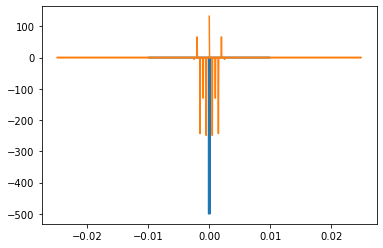

In [292]:
# TODO: normalize

fm_fft = np.fft.fft(fm_mod_signal)
fm_time = np.fft.fftfreq(len(fm_mod_signal), freq_carrier_fm)

plt.plot(time_pure, pure_signal_fft.real, fm_time, fm_fft.real)

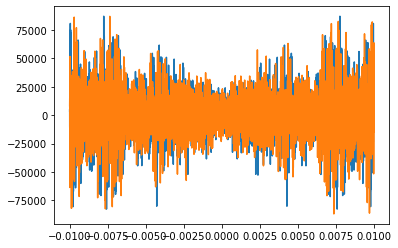

In [175]:
ft_audio = np.fft.fft(data)
freq = np.fft.fftfreq(len(data))
window = 0.0
x_ax = freq[(freq > -window) & (freq < window)]

sample_count = int(len(x_ax)/2)
samples_left = int(len(ft_audio)/2) - sample_count
samples_right = int(len(ft_audio)/2) + sample_count
y_ax = ft_audio[samples_left:(samples_right + 1)]

plt.plot(x_ax, y_ax.real, x_ax, y_ax.imag)
plt.show()

# Idźmy dalej...

**dyskretna transformata Fouriera**

# Złożoność obliczeniowa

**FFT - Cooley-Tukey**

# Własności transformaty Fouriera

**TODO**
- splot -> mnożenie
- odwrotna transformata Fouriera

# Bibliografia

- prof. Tadeusz. Zieliński, ''Cyfrowe Przetwarzanie Sygnałów - Od Teorii do Zastosowań''
- prof. Jerzy Szabatin, ''Przetwarzanie Sygnałów''
- R. K. Rao Yarlagadda, ''Analog and Digital Signals and Systems''
- Richard G. Lyons, ''Understanding Digital Signal Processing''
- dr Kinga McInerney, ''Fourier Series for Electronics and Telecommunications''
- dr Kinga McInerney, ''Fourier Transform for Electronics and Telecommunications''
- Theodore Rappaport, ''Wireless Communications Principles and Practice''